In [2]:
!pip install yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.7 MB/s eta 0:00:00


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from statistics import mode
import yake
import re
import requests
from bs4 import BeautifulSoup
from googlesearch import search
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving IMDB_Movies.csv to IMDB_Movies.csv


In [5]:
dataset = pd.read_csv('IMDB_Movies.csv')

In [6]:
dataset.shape

(5043, 28)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
#Rearranging columns for convenience
df1=dataset.iloc[:, [11, 0, 1, 10, 6, 14, 20, 3, 26, 19, 16, 23, 21, 15, 22, 8, 17, 25, 2, 12, 18, 27, 4, 7, 24, 5, 13, 9]]

In [9]:
df1.head()

movie_title  color  \
0                                            Avatar   Color   
1          Pirates of the Caribbean: At World's End   Color   
2                                           Spectre   Color   
3                             The Dark Knight Rises   Color   
4  Star Wars: Episode VII - The Force Awakens    ...    NaN   

       director_name     actor_1_name      actor_2_name          actor_3_name  \
0      James Cameron      CCH Pounder  Joel David Moore             Wes Studi   
1     Gore Verbinski      Johnny Depp     Orlando Bloom        Jack Davenport   
2         Sam Mendes  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3  Christopher Nolan        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4        Doug Walker      Doug Walker        Rob Walker                   NaN   

  country  duration  aspect_ratio language  \
0     USA     178.0          1.78  English   
1     USA     169.0          2.35  English   
2      UK     148.0          2.35  English   
3     USA     164.0          2.35  English   
4     NaN       NaN           NaN      NaN   

                                       plot_keywords  title_year  \
0             avatar|future|marine|native|paraplegic      2009.0   
1  goddess|marriage ceremony|marriage proposal|pi...      2007.0   
2                bomb|espionage|sequel|spy|terrorist      2015.0   
3  deception|imprisonment|lawlessness|police offi...      2012.0   
4                                                NaN         NaN   

  content_rating  facenumber_in_poster       budget        gross  \
0          PG-13                   0.0  237000000.0  760505847.0   
1          PG-13                   0.0  300000000.0  309404152.0   
2          PG-13                   1.0  245000000.0  200074175.0   
3          PG-13                   0.0  250000000.0  448130642.0   
4            NaN                   0.0          NaN          NaN   

                                     movie_imdb_link  imdb_score  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...         7.9   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...         7.1   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...         6.8   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...         8.5   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...         7.1   

   num_critic_for_reviews  num_voted_users num_user_for_reviews  \
0                   723.0           886204                 3054   
1                   302.0           471220                 1238   
2                   602.0           275868                  994   
3                   813.0          1144337                 2701   
4                     NaN                8                        

   movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
0                 33000                      0.0                  1000.0   
1                     0                    563.0                 40000.0   
2                 85000                      0.0                 11000.0   
3                164000                  22000.0                 27000.0   
4                     0                    131.0                   131.0   

   actor_2_facebook_likes  actor_3_facebook_likes  cast_total_facebook_likes  \
0                   936.0                   855.0                       4834   
1                  5000.0                  1000.0                      48350   
2                   393.0                   161.0                      11700   
3                 23000.0                 23000.0                     106759   
4                    12.0                     NaN                        143   

                            genres  
0  Action|Adventure|Fantasy|Sci-Fi  
1         Action|Adventure|Fantasy  
2        Action|Adventure|Thriller  
3                  Action|Thriller  
4                      Documentary

In [10]:
#removing any extra spaces from the beginning and end of each movie title
df1['movie_title']=df1['movie_title'].apply(lambda x: x.strip())

# Removing duplicates

In [11]:
#checking for duplicates in rows
df1[df1.duplicated(keep=False)].sort_values(by='movie_title')

movie_title             color  \
4950                          A Dog's Breakfast             Color   
4949                          A Dog's Breakfast             Color   
4408           A Woman, a Gun and a Noodle Shop             Color   
3007           A Woman, a Gun and a Noodle Shop             Color   
2181                                   Bad Moms             Color   
2562                                   Bad Moms             Color   
2798                               Big Fat Liar             Color   
2628                               Big Fat Liar             Color   
4942                                 Cat People             Color   
2902                                 Cat People             Color   
3193                                      Crash             Color   
3452                                      Crash             Color   
2935                                 Crossroads             Color   
4769                                 Crossroads             Color   
2777                         Dangerous Liaisons             Color   
2016                         Dangerous Liaisons             Color   
2292                         Death at a Funeral             Color   
2134                         Death at a Funeral             Color   
389                              Fantastic Four             Color   
249                              Fantastic Four             Color   
2025                                  Footloose             Color   
3345                                  Footloose             Color   
2472                                   Forsaken             Color   
2073                                   Forsaken             Color   
1096                                  From Hell             Color   
1449                                  From Hell             Color   
204                         Godzilla Resurgence             Color   
98                          Godzilla Resurgence             Color   
2492                                  Halloween             Color   
2619                                  Halloween             Color   
4182                               Halloween II             Color   
2645                               Halloween II             Color   
2454                                     Hamlet             Color   
4282                                     Hamlet             Color   
590                                    Hercules             Color   
314                                    Hercules             Color   
1171                                       Hero   Black and White   
2493                                       Hero   Black and White   
3041               History of the World: Part I             Color   
4573               History of the World: Part I             Color   
2568                                Left Behind             Color   
2399                                Left Behind             Color   
1962                            My Soul to Take             Color   
3915                            My Soul to Take             Color   
4951                   Night of the Living Dead   Black and White   
3887                   Night of the Living Dead   Black and White   
3729                                          O             Color   
3064                                          O             Color   
303                                         Pan             Color   
145                                         Pan             Color   
3800                               Saving Grace             Color   
3900                               Saving Grace             Color   
3117                                     Snatch             Color   
3017                                     Snatch             Color   
4313                           Stealing Harvard             Color   
1965                           Stealing Harvard             Color   
348                                   The Alamo             Color   
2971                              

In [12]:
#removing duplicates and keeping one
df1.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
#checking duplicates in movie_title column
dft=df1[df1.duplicated(subset=['movie_title'], keep=False)].sort_values(by='movie_title')
dft

movie_title             color  \
4853      20,000 Leagues Under the Sea             Color   
3683      20,000 Leagues Under the Sea             Color   
1409         A Nightmare on Elm Street             Color   
4317         A Nightmare on Elm Street             Color   
1104               Across the Universe             Color   
4802               Across the Universe             Color   
4097               Alice in Wonderland             Color   
33                 Alice in Wonderland             Color   
1378                             Aloha             Color   
2619                             Aloha             Color   
3559       Around the World in 80 Days             Color   
268        Around the World in 80 Days             Color   
2594                           Ben-Hur             Color   
3936                           Ben-Hur             Color   
363                            Ben-Hur             Color   
2859                          Brothers             Color   
1840                          Brothers             Color   
4315                            Carrie             Color   
1650                            Carrie             Color   
283                      Casino Royale   Black and White   
2921                     Casino Royale   Black and White   
2051                   Chasing Liberty             Color   
1693                   Chasing Liberty             Color   
332                         Cinderella             Color   
4110                        Cinderella             Color   
210                Clash of the Titans             Color   
2630               Clash of the Titans             Color   
2180               Conan the Barbarian             Color   
385                Conan the Barbarian             Color   
424                          Creepshow             Color   
3344                         Creepshow             Color   
1747                  Dawn of the Dead             Color   
4366                  Dawn of the Dead             Color   
2455                   Day of the Dead             Color   
3970                   Day of the Dead             Color   
3182                           Dekalog             Color   
2801                           Dekalog             Color   
2154                         Disturbia             Color   
1308                         Disturbia             Color   
4170  Dodgeball: A True Underdog Story   Black and White   
1583  Dodgeball: A True Underdog Story   Black and White   
422                              Dredd             Color   
1113                             Dredd             Color   
2047                   Eddie the Eagle             Color   
1932                   Eddie the Eagle             Color   
158             Exodus: Gods and Kings             Color   
3862            Exodus: Gods and Kings             Color   
1051                       First Blood             Color   
2751                       First Blood             Color   
149                       Ghostbusters             Color   
1570                      Ghostbusters             Color   
1701                             Glory             Color   
2404                             Glory             Color   
806                         Goosebumps             Color   
4532                        Goosebumps             Color   
2477                         Halloween             Color   
4781                         Halloween             Color   
3292                             Heist             Color   
1451                             Heist             Color   
4713                              Home             Color   
2986                              Home             Color   
186                               Home             Color   
1439                      House of Wax             Color   
4656                      House of Wax             Color   
731                       Jack Reacher             Color   
4410                      Jack Reacher             Color   
4521   

In [14]:
# Create an empty list to store the results
results = []

# Loop through each group of duplicate movie titles
for _, group in dft.groupby('movie_title'):
    # If there's only one entry, skip it
    if len(group) == 1:
        continue

    # Create a list to store the movie title and differences
    for i in range(len(group) - 1):
        row_diff = [group['movie_title'].iloc[i]]  # Start with the movie title

        for col in dft.columns[1:]:
            # Compare consecutive rows for the same movie title
            if group[col].iloc[i] == group[col].iloc[i + 1]:
                row_diff.append("Same")
            else:
                row_diff.append(f"{group[col].iloc[i]} - {group[col].iloc[i + 1]}")

        results.append(row_diff)

# Results list now contains the differences


In [15]:
dft_1 = pd.DataFrame(results, columns=dft.columns)
dft_1

movie_title color                   director_name  \
0       20,000 Leagues Under the Sea  Same                            Same   
1          A Nightmare on Elm Street  Same                            Same   
2                Across the Universe  Same                            Same   
3                Alice in Wonderland  Same                            Same   
4                              Aloha  Same                            Same   
5        Around the World in 80 Days  Same                            Same   
6                            Ben-Hur  Same                            Same   
7                            Ben-Hur  Same                            Same   
8                           Brothers  Same                            Same   
9                             Carrie  Same                            Same   
10                     Casino Royale  Same                            Same   
11                   Chasing Liberty  Same                            Same   
12                        Cinderella  Same                            Same   
13               Clash of the Titans  Same                            Same   
14               Conan the Barbarian  Same                            Same   
15                         Creepshow  Same                            Same   
16                  Dawn of the Dead  Same                            Same   
17                   Day of the Dead  Same                            Same   
18                           Dekalog  Same                       nan - nan   
19                         Disturbia  Same                            Same   
20  Dodgeball: A True Underdog Story  Same                            Same   
21                             Dredd  Same                            Same   
22                   Eddie the Eagle  Same                            Same   
23            Exodus: Gods and Kings  Same                            Same   
24                       First Blood  Same                            Same   
25                      Ghostbusters  Same                            Same   
26                             Glory  Same                            Same   
27                        Goosebumps  Same                            Same   
28                         Halloween  Same                            Same   
29                             Heist  Same                            Same   
30                              Home  Same                            Same   
31                              Home  Same                            Same   
32                      House of Wax  Same                            Same   
33                      Jack Reacher  Same                            Same   
34                              Juno  Same                            Same   
35                         King Kong  Same                            Same   
36                         King Kong  Same                            Same   
37                            Lolita  Same                            Same   
38               Lucky Number Slevin  Same                            Same   
39                    Mercury Rising  Same                            Same   
40                 Murder by Numbers  Same                            Same   
41                   Out of the Blue  Same  Dennis Hopper - Robert Sarkies   
42         Oz the Great and Powerful  Same                            Same   
43                               Pan  Same                            Same   
44                Planet of the Apes  Same                            Same   
45                       Point Break  Same                            Same   
46                       Poltergeist  Same                            Same   
47                          Precious  Same                            Same   
48                           RoboCop  Same                            Same   
49                          Sabotage  Same                            Same   
50                      Side Effects  Same     

In [16]:
#removing duplicates
df2=df1[~df1.duplicated(subset=['movie_title']) | (df1['movie_title']=="Out of the Blue") | (df1['movie_title']=="The Host")]

In [17]:
import gc

In [18]:
del [[dft, dft_1]]
gc.collect()

0

# Null Values

In [19]:
#checking for null values
df2.loc[:, '#_Null_Elms'] = df2.isna().sum(axis=1)
df2.head()

movie_title  color      director_name  \
0                                      Avatar  Color      James Cameron   
1    Pirates of the Caribbean: At World's End  Color     Gore Verbinski   
2                                     Spectre  Color         Sam Mendes   
3                       The Dark Knight Rises  Color  Christopher Nolan   
4  Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

      actor_1_name      actor_2_name          actor_3_name country  duration  \
0      CCH Pounder  Joel David Moore             Wes Studi     USA     178.0   
1      Johnny Depp     Orlando Bloom        Jack Davenport     USA     169.0   
2  Christoph Waltz      Rory Kinnear      Stephanie Sigman      UK     148.0   
3        Tom Hardy    Christian Bale  Joseph Gordon-Levitt     USA     164.0   
4      Doug Walker        Rob Walker                   NaN     NaN       NaN   

   aspect_ratio language                                      plot_keywords  \
0          1.78  English             avatar|future|marine|native|paraplegic   
1          2.35  English  goddess|marriage ceremony|marriage proposal|pi...   
2          2.35  English                bomb|espionage|sequel|spy|terrorist   
3          2.35  English  deception|imprisonment|lawlessness|police offi...   
4           NaN      NaN                                                NaN   

   title_year content_rating  facenumber_in_poster       budget        gross  \
0      2009.0          PG-13                   0.0  237000000.0  760505847.0   
1      2007.0          PG-13                   0.0  300000000.0  309404152.0   
2      2015.0          PG-13                   1.0  245000000.0  200074175.0   
3      2012.0          PG-13                   0.0  250000000.0  448130642.0   
4         NaN            NaN                   0.0          NaN          NaN   

                                     movie_imdb_link  imdb_score  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...         7.9   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...         7.1   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...         6.8   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...         8.5   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...         7.1   

   num_critic_for_reviews  num_voted_users num_user_for_reviews  \
0                   723.0           886204                 3054   
1                   302.0           471220                 1238   
2                   602.0           275868                  994   
3                   813.0          1144337                 2701   
4                     NaN                8                        

   movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
0                 33000                      0.0                  1000.0   
1                     0                    563.0                 40000.0   
2                 85000                      0.0                 11000.0   
3                164000                  22000.0                 27000.0   
4                     0                    131.0                   131.0   

   actor_2_facebook_likes  actor_3_facebook_likes  cast_total_facebook_likes  \
0                   936.0                   855.0                       4834   
1                  5000.0                  1000.0                      48350   
2                   393.0                   161.0                      11700   
3                 23000.0                 23000.0                     106759   
4                    12.0                     NaN                        143   

                            genres  #_Null_Elms  
0  Action|Adventure|Fantasy|Sci-Fi            0  
1         Action|Adventure|Fantasy            0  
2        Action|Adventure|Thriller            0  
3                  Action|Thriller            0  
4                      Documentary           13

In [20]:
#checking frequency of row wise null values
df2['#_Null_Elms'].value_counts()

#_Null_Elms
0     3655
1      678
2      267
3      123
5       69
4       52
6       36
7       20
8       11
10       2
11       2
13       1
15       1
9        1
Name: count, dtype: int64

In [21]:
#removing rows having null values >9
df2 = df2.loc[df2['#_Null_Elms'] < 9].copy()

In [22]:
#checking for null values column wise
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1

#_Null
gross                         855
budget                        480
aspect_ratio                  319
content_rating                294
plot_keywords                 149
title_year                    100
director_facebook_likes        98
director_name                  98
num_critic_for_reviews         45
actor_3_name                   18
actor_3_facebook_likes         18
num_user_for_reviews           17
color                          16
duration                       14
facenumber_in_poster           13
language                       11
actor_2_name                    9
actor_2_facebook_likes          9
actor_1_name                    6
actor_1_facebook_likes          6
country                         3
genres                          0
cast_total_facebook_likes       0
movie_title                     0
movie_facebook_likes            0
num_voted_users                 0
imdb_score                      0
movie_imdb_link                 0
#_Null_Elms                     0

In [23]:
#dealing with null values in gross column
dft_2=df2[~df2['gross'].isna()][['gross', 'imdb_score']]
dft_2

gross  imdb_score
0     760505847.0         7.9
1     309404152.0         7.1
2     200074175.0         6.8
3     448130642.0         8.5
5      73058679.0         6.6
6     336530303.0         6.2
7     200807262.0         7.8
8     458991599.0         7.5
9     301956980.0         7.5
10    330249062.0         6.9
11    200069408.0         6.1
12    168368427.0         6.7
13    423032628.0         7.3
14     89289910.0         6.5
15    291021565.0         7.2
16    141614023.0         6.6
17    623279547.0         8.1
18    241063875.0         6.7
19    179020854.0         6.8
20    255108370.0         7.5
21    262030663.0         7.0
22    105219735.0         6.7
23    258355354.0         7.9
24     70083519.0         6.1
25    218051260.0         7.2
26    658672302.0         7.7
27    407197282.0         8.2
28     65173160.0         5.9
29    652177271.0         7.0
30    304360277.0         7.8
31    373377893.0         7.3
32    408992272.0         7.2
33    334185206.0         6.5
34    234360014.0         6.8
35    268488329.0         7.3
36    402076689.0         6.0
37    245428137.0         5.7
38    234903076.0         6.4
39    202853933.0         6.7
40    172051787.0         6.8
41    191450875.0         6.3
42    116593191.0         5.6
43    414984497.0         8.3
44    125320003.0         6.6
45    350034110.0         7.2
46    202351611.0         7.0
47    233914986.0         8.0
48    228756232.0         7.8
49     65171860.0         6.3
50    144812796.0         7.3
51     90755643.0         6.6
52    101785482.0         7.0
53    352358779.0         6.3
54    317011114.0         6.2
55    123070338.0         6.8
56    237282182.0         7.2
57    130468626.0         7.5
58    223806889.0         8.4
59    140080850.0         6.2
60    166112167.0         5.8
61    137850096.0         6.8
62     47375327.0         5.4
63    124051759.0         6.6
64    291709845.0         6.9
65    154985087.0         7.3
66    533316061.0         9.0
67    292979556.0         8.3
68    198332128.0         6.5
69    318298180.0         7.9
70     73820094.0         7.5
71    113745408.0         4.8
72    102176165.0         5.2
73    161087183.0         6.9
74    100289690.0         5.4
75    100189501.0         7.9
76     88246220.0         6.1
77    150167630.0         5.8
78    356454367.0         8.3
79    362645141.0         7.8
80    312057433.0         7.0
81    155111815.0         6.1
82    241407328.0         7.0
83    208543795.0         7.6
85     38297305.0         6.3
86    259746958.0         7.8
87    238371987.0         6.4
88     93417865.0         6.5
89    222487711.0         7.9
90    189412677.0         7.8
91       665426.0         6.6
92    102315545.0         5.5
93    217387997.0         8.2
94    150350192.0         6.4
95    333130696.0         8.1
96    187991439.0         8.6
97    292568851.0         8.8
99    303001229.0         7.9
100   144512310.0         6.7
101   127490802.0         7.8
102   146405371.0         7.8
103   281666058.0         6.6
104    63143812.0         6.1
105    60655503.0         5.6
106    76846624.0         6.4
107   320706665.0         6.1
108    46978995.0         7.3
109    89732035.0         6.6
110   104383624.0         6.3
111   198539855.0         6.1
112   318759914.0         7.1
113    34293771.0         5.5
114   292000866.0         7.5
115   289994397.0         7.6
116   227946274.0         6.4
117   256386216.0         7.2
118   206456431.0         6.7
119   206435493.0         8.0
120   205343774.0         8.3
121   179982968.0         6.7
122   177243721.0         5.9
123   179883016.0         6.7
124   139259759.0         6.7
125   400736600.0         7.6
126   281492479.0         7.2
127   206360018.0         7.1
128   153629485.0         8.1
129   133375846.0         6.7
130   181015141.0         7.0
131   114053579.0         6.9
132   119420252.0         5.1
133    83640426.0         5.8
134    79711678.0         6.2
135   195000874.0     

In [24]:
lr=LinearRegression().fit(dft_2['imdb_score'].values.reshape(-1, 1), dft_2['gross'].values)

In [25]:
# Assuming 'df2' is your DataFrame and 'lr' is your LinearRegression model
# Create a copy of the DataFrame to avoid modifying the original DataFrame
df2_copy = df2.copy()

In [26]:
# Fit the model and predict
for i in df2_copy.index[df2_copy['gross'].isna()]:
    imdb_score = df2_copy.loc[i, 'imdb_score']
    predicted_gross = round(lr.predict([[imdb_score]])[0], 2)
    df2_copy.loc[i, 'gross'] = predicted_gross

In [27]:
del [[dft_2]]
gc.collect()

0

In [28]:
#checking null values in budget column
dft_2=df2[~df2['budget'].isna()][['budget', 'imdb_score']]
dft_2

budget  imdb_score
0     2.370000e+08         7.9
1     3.000000e+08         7.1
2     2.450000e+08         6.8
3     2.500000e+08         8.5
5     2.637000e+08         6.6
6     2.580000e+08         6.2
7     2.600000e+08         7.8
8     2.500000e+08         7.5
9     2.500000e+08         7.5
10    2.500000e+08         6.9
11    2.090000e+08         6.1
12    2.000000e+08         6.7
13    2.250000e+08         7.3
14    2.150000e+08         6.5
15    2.250000e+08         7.2
16    2.250000e+08         6.6
17    2.200000e+08         8.1
18    2.500000e+08         6.7
19    2.250000e+08         6.8
20    2.500000e+08         7.5
21    2.300000e+08         7.0
22    2.000000e+08         6.7
23    2.250000e+08         7.9
24    1.800000e+08         6.1
25    2.070000e+08         7.2
26    2.000000e+08         7.7
27    2.500000e+08         8.2
28    2.090000e+08         5.9
29    1.500000e+08         7.0
30    2.000000e+08         7.8
31    2.000000e+08         7.3
32    2.000000e+08         7.2
33    2.000000e+08         6.5
34    2.100000e+08         6.8
35    2.000000e+08         7.3
36    2.000000e+08         6.0
37    2.100000e+08         5.7
38    2.150000e+08         6.4
39    2.000000e+08         6.7
40    1.700000e+08         6.8
41    2.000000e+08         6.3
42    2.000000e+08         5.6
43    2.000000e+08         8.3
44    2.000000e+08         6.6
45    1.900000e+08         7.2
46    1.900000e+08         7.0
47    2.000000e+08         8.0
48    1.900000e+08         7.8
49    1.950000e+08         6.3
50    1.050000e+08         7.3
51    2.000000e+08         6.6
52    1.900000e+08         7.0
53    1.950000e+08         6.3
54    1.850000e+08         6.2
56    1.850000e+08         7.2
57    1.850000e+08         7.5
58    1.800000e+08         8.4
59    1.400000e+08         6.2
60    2.000000e+08         5.8
61    2.000000e+08         6.8
62    1.760000e+08         5.4
63    1.800000e+08         6.6
64    1.800000e+08         6.9
65    1.780000e+08         7.3
66    1.850000e+08         9.0
67    1.750000e+08         8.3
68    1.750000e+08         6.5
69    1.400000e+08         7.9
70    1.700000e+08         7.5
71    1.700000e+08         4.8
72    1.450000e+08         5.2
73    1.750000e+08         6.9
74    1.750000e+08         5.4
75    1.780000e+08         7.9
76    1.750000e+08         6.1
77    1.750000e+08         5.8
78    1.750000e+08         8.3
79    1.750000e+08         7.8
80    2.000000e+08         7.0
81    1.700000e+08         6.1
82    1.800000e+08         7.0
83    1.700000e+08         7.6
85    1.750000e+08         6.3
86    1.700000e+08         7.8
87    1.650000e+08         6.4
88    1.900000e+08         6.5
89    1.650000e+08         7.9
90    1.650000e+08         7.8
91    1.650000e+08         6.6
92    1.650000e+08         5.5
93    1.650000e+08         8.2
94    2.000000e+08         6.4
95    1.700000e+08         8.1
96    1.650000e+08         8.6
97    1.600000e+08         8.8
99    1.800000e+08         7.9
100   3.800000e+07         6.7
101   1.500000e+08         7.8
102   1.600000e+08         7.8
103   1.600000e+08         6.6
104   1.500000e+08         6.1
105   1.600000e+08         5.6
106   1.700000e+08         6.4
107   1.600000e+08         6.1
108   1.600000e+08         7.3
109   1.550000e+08         6.6
110   1.550000e+08         6.3
111   1.400000e+08         6.1
112   1.500000e+08         7.1
113   1.550000e+08         5.5
114   1.500000e+08         7.5
115   1.500000e+08         7.6
116   1.500000e+08         6.4
117   1.500000e+08         7.2
118   1.500000e+08         6.7
119   1.500000e+08         8.0
120   1.500000e+08         8.3
121   1.500000e+08         6.7
122   1.500000e+08         5.9
123   1.500000e+08         6.7
124   1.500000e+08         6.7
125   1.500000e+08         7.6
126   1.500000e+08         7.2
127   1.700000e+08         7.1
128   1.500000e+08         8.1
129   1.500000e+08         6.7
130   1.500000e+08         7.0
131   1.500000e+08         6.9
132   1.50000

In [29]:
lr=LinearRegression().fit(dft_2['imdb_score'].values.reshape(-1, 1), dft_2['budget'].values)

In [30]:
# Make sure 'df2' is a copy to avoid modifying the original DataFrame
df2_copy = df2.copy()
# Loop through rows where 'budget' is null
for i in df2_copy.index[df2_copy['budget'].isna()]:
    imdb_score = df2_copy.loc[i, 'imdb_score']
    predicted_budget = round(lr.predict([[imdb_score]])[0], 2)
    df2_copy.loc[i, 'budget'] = predicted_budget

In [31]:
#null values in aspect_ratio column
dft_2 = df2[~df2['aspect_ratio'].isna()][['aspect_ratio', 'language']]
dft_2.sort_values(by=['language'], inplace=True, ignore_index=True)
dft_2

aspect_ratio    language
0             2.35  Aboriginal
1             2.35  Aboriginal
2             1.85      Arabic
3             1.85      Arabic
4             1.85      Arabic
5             1.85      Arabic
6             2.35     Aramaic
7             2.35     Bosnian
8             1.85   Cantonese
9             1.85   Cantonese
10            2.35   Cantonese
11            2.35   Cantonese
12            2.35   Cantonese
13            2.35   Cantonese
14            2.35   Cantonese
15            2.35   Cantonese
16            2.35   Cantonese
17            2.35   Cantonese
18            2.35   Cantonese
19            1.85     Chinese
20            2.35     Chinese
21            2.35     Chinese
22            1.85       Czech
23            1.85      Danish
24            1.33      Danish
25            1.37      Danish
26            2.35      Danish
27            2.35      Danish
28            1.85        Dari
29            2.35        Dari
30            1.85       Dutch
31            1.85       Dutch
32            2.35       Dutch
33            2.35       Dutch
34            1.85    Dzongkha
35            2.35     English
36            1.85     English
37            1.85     English
38            1.85     English
39            1.85     English
40            1.85     English
41            1.85     English
42            2.20     English
43            2.35     English
44            2.35     English
45            2.35     English
46            2.35     English
47            2.35     English
48            2.35     English
49            2.35     English
50            1.85     English
51            2.35     English
52            2.35     English
53            1.85     English
54            1.85     English
55            1.85     English
56            1.85     English
57            1.85     English
58            1.85     English
59            2.35     English
60            1.85     English
61            1.85     English
62            2.35     English
63            2.35     English
64            1.85     English
65            1.85     English
66            1.85     English
67            2.35     English
68            2.35     English
69            1.85     English
70            1.85     English
71            1.85     English
72            2.35     English
73            1.85     English
74            1.66     English
75            1.85     English
76            1.85     English
77            2.35     English
78            1.85     English
79            1.85     English
80            2.35     English
81            2.35     English
82            1.85     English
83            1.85     English
84            1.85     English
85            1.85     English
86            2.35     English
87            1.85     English
88            2.35     English
89            2.35     English
90            2.35     English
91            2.35     English
92            2.35     English
93            2.35     English
94            1.85     English
95            1.85     English
96            2.35     English
97            2.35     English
98            2.35     English
99            2.35     English
100           1.85     English
101           1.85     English
102           2.35     English
103           1.85     English
104           1.85     English
105           1.85     English
106           1.85     English
107           2.35     English
108           2.35     English
109           1.85     English
110           1.85     English
111           1.85     English
112           1.85     English
113           2.35     English
114           2.35     English
115           1.85     English
116           2.35     English
117           2.35     English
118           2.35     English
119           1.85     English
120           1.85     English
121           2.35     English
122           1.85     English
123           1.85     English
124           2.35     English
125           1.85     English
126           1.85     English
127           2.35     English
128    

In [32]:
#groups the dft_2 DataFrame by the language column and then iterates through each language group.
#For each language, it extracts and sorts the aspect_ratio values, prints the language,
#the sorted aspect ratios, and the number of movies that have that language.
dft_3=dft_2.groupby(by=['language'])
for i in dft_3:
    lst=np.sort(i[1]['aspect_ratio'].values)
    print("Language: ", i[0][0])
    print("Aspect Ratio: ", lst, 'Number of Movies: ', len(lst), '\n')

Language:  Aboriginal
Aspect Ratio:  [2.35 2.35] Number of Movies:  2 

Language:  Arabic
Aspect Ratio:  [1.85 1.85 1.85 1.85] Number of Movies:  4 

Language:  Aramaic
Aspect Ratio:  [2.35] Number of Movies:  1 

Language:  Bosnian
Aspect Ratio:  [2.35] Number of Movies:  1 

Language:  Cantonese
Aspect Ratio:  [1.85 1.85 2.35 2.35 2.35 2.35 2.35 2.35 2.35 2.35 2.35] Number of Movies:  11 

Language:  Chinese
Aspect Ratio:  [1.85 2.35 2.35] Number of Movies:  3 

Language:  Czech
Aspect Ratio:  [1.85] Number of Movies:  1 

Language:  Danish
Aspect Ratio:  [1.33 1.37 1.85 2.35 2.35] Number of Movies:  5 

Language:  Dari
Aspect Ratio:  [1.85 2.35] Number of Movies:  2 

Language:  Dutch
Aspect Ratio:  [1.85 1.85 2.35 2.35] Number of Movies:  4 

Language:  Dzongkha
Aspect Ratio:  [1.85] Number of Movies:  1 

Language:  English
Aspect Ratio:  [ 1.18  1.2   1.33 ... 16.   16.   16.  ] Number of Movies:  4306 

Language:  Filipino
Aspect Ratio:  [2.35] Number of Movies:  1 

Language:  

In [33]:
from scipy.stats import mode

In [34]:
#calculates the most frequent aspect_ratio (mode) for each language group in the DataFrame and stores these values in a dictionary,
#where the key is the language and the value is the mode of aspect_ratio for that language.
d = dict()
for i in dft_3:
    aspect_ratios = i[1]['aspect_ratio']
    mode_result = aspect_ratios.mode()
    mode_value = mode_result[0]  # Access the mode value directly
    d[i[0]] = mode_value
d

{('Aboriginal',): 2.35,
 ('Arabic',): 1.85,
 ('Aramaic',): 2.35,
 ('Bosnian',): 2.35,
 ('Cantonese',): 2.35,
 ('Chinese',): 2.35,
 ('Czech',): 1.85,
 ('Danish',): 2.35,
 ('Dari',): 1.85,
 ('Dutch',): 1.85,
 ('Dzongkha',): 1.85,
 ('English',): 2.35,
 ('Filipino',): 2.35,
 ('French',): 2.35,
 ('German',): 1.85,
 ('Greek',): 2.35,
 ('Hebrew',): 1.85,
 ('Hindi',): 2.35,
 ('Hungarian',): 2.35,
 ('Icelandic',): 2.35,
 ('Indonesian',): 1.85,
 ('Italian',): 2.35,
 ('Japanese',): 1.85,
 ('Kazakh',): 2.35,
 ('Korean',): 2.35,
 ('Mandarin',): 2.35,
 ('Maya',): 1.85,
 ('Mongolian',): 2.35,
 ('Norwegian',): 1.85,
 ('Persian',): 1.85,
 ('Polish',): 1.33,
 ('Portuguese',): 2.35,
 ('Romanian',): 1.85,
 ('Russian',): 1.85,
 ('Slovenian',): 2.35,
 ('Spanish',): 1.85,
 ('Swedish',): 2.35,
 ('Telugu',): 1.85,
 ('Thai',): 1.85,
 ('Vietnamese',): 1.85,
 ('Zulu',): 1.85}

In [35]:
#aspect_ratio values are filled based on the language-specific mode where available and
#defaults to the mode for English if any values are still missing.
for i in d.items():
    df2.loc[df2['language']==i[0], 'aspect_ratio']=df2.loc[df2['language']==i[0], 'aspect_ratio'].fillna(i[1])
df2['aspect_ratio'].fillna(d['English',], inplace=True)

In [36]:
# Handle null values in the 'content_rating' column by associating genres
# Select rows from df2 where 'content_rating' is not null and
# keep only 'content_rating' and 'genres' columns
dft_2 = df2[~df2['content_rating'].isna()][['content_rating', 'genres']]
# Split the 'genres' column into multiple columns based on the '|' separator, creating a new DataFrame
dft_2_1 = dft_2['genres'].str.split(pat='|', n=-1, expand=True)
# Join the split genre columns back to the original dft_2 DataFrame
dft_2 = dft_2.join(dft_2_1)
# Drop the original 'genres' column since its information is now split into separate columns
dft_2.drop(['genres'], axis=1, inplace=True)
dft_2

content_rating            0            1            2         3  \
0             PG-13       Action    Adventure      Fantasy    Sci-Fi   
1             PG-13       Action    Adventure      Fantasy      None   
2             PG-13       Action    Adventure     Thriller      None   
3             PG-13       Action     Thriller         None      None   
5             PG-13       Action    Adventure       Sci-Fi      None   
6             PG-13       Action    Adventure      Romance      None   
7                PG    Adventure    Animation       Comedy    Family   
8             PG-13       Action    Adventure       Sci-Fi      None   
9                PG    Adventure       Family      Fantasy   Mystery   
10            PG-13       Action    Adventure       Sci-Fi      None   
11            PG-13       Action    Adventure       Sci-Fi      None   
12            PG-13       Action    Adventure         None      None   
13            PG-13       Action    Adventure      Fantasy      None   
14            PG-13       Action    Adventure      Western      None   
15            PG-13       Action    Adventure      Fantasy    Sci-Fi   
16               PG       Action    Adventure       Family   Fantasy   
17            PG-13       Action    Adventure       Sci-Fi      None   
18            PG-13       Action    Adventure      Fantasy      None   
19            PG-13       Action    Adventure       Comedy    Family   
20            PG-13    Adventure      Fantasy         None      None   
21            PG-13       Action    Adventure      Fantasy      None   
22            PG-13       Action    Adventure        Drama   History   
23            PG-13    Adventure      Fantasy         None      None   
24            PG-13    Adventure       Family      Fantasy      None   
25            PG-13       Action    Adventure        Drama   Romance   
26            PG-13        Drama      Romance         None      None   
27            PG-13       Action    Adventure       Sci-Fi      None   
28            PG-13       Action    Adventure       Sci-Fi  Thriller   
29            PG-13       Action    Adventure       Sci-Fi  Thriller   
30            PG-13       Action    Adventure     Thriller      None   
31            PG-13       Action    Adventure      Fantasy   Romance   
32            PG-13       Action    Adventure       Sci-Fi      None   
33               PG    Adventure       Family      Fantasy      None   
34            PG-13       Action    Adventure      Fantasy    Sci-Fi   
35                G    Adventure    Animation       Comedy    Family   
36            PG-13       Action    Adventure       Sci-Fi      None   
37            PG-13       Action    Adventure       Sci-Fi      None   
38               PG    Adventure       Family      Fantasy      None   
39            PG-13       Action    Adventure      Fantasy    Sci-Fi   
40               PG       Action    Adventure       Sci-Fi      None   
41                G    Adventure    Animation       Comedy    Family   
42            PG-13       Action    Adventure       Sci-Fi      None   
43                G    Adventure    Animation       Comedy    Family   
44            PG-13       Action    Adventure       Sci-Fi      None   
45            PG-13       Action        Crime     Thriller      None   
46            PG-13       Action    Adventure       Horror    Sci-Fi   
47            PG-13       Action    Adventure      Fantasy    Sci-Fi   
48            PG-13       Action    Adventure       Sci-Fi      None   
49            PG-13    Adventure      Fantasy         None      None   
50            PG-13        Drama      Romance         None      None   
51            PG-13       Action    Adventure      Fantasy   Romance   
52            PG-13       Action    Adventure       Sci-Fi      None   
53            PG-13       Action    Adventure       Sci-Fi      None   
54            PG-13       Action    Adventure      Fantasy      None   
55               PG    Adventure    Animation

In [37]:
#remove None values
l=list(pd.unique(dft_2[list(range(0,8))].values.ravel('K')))
l.remove(None)

In [38]:
#finding and mapping the most common content_rating based on multiple columns
dct={}
for i in l:
    dct[i]=dft_2[dft_2[list(range(0,8))].isin([i]).any(axis=1)]['content_rating'].mode().values[0]

In [39]:
# Filter rows from df2 where 'content_rating' is null, and select only 'content_rating' and 'genres' columns
dft_3 = df2[df2['content_rating'].isna()][['content_rating', 'genres']]
# Split the 'genres' column into multiple columns based on the '|' separator
dft_3_1 = dft_3['genres'].str.split(pat='|', n=-1, expand=True)
# Join the split genres columns back to the original dft_3 DataFrame
dft_3 = dft_3.join(dft_3_1)
# Drop the original 'genres' column as it's now represented by the new split columns
dft_3.drop(['genres'], axis=1, inplace=True)
dft_3

content_rating            0            1            2         3  \
98              NaN       Action    Adventure        Drama    Horror   
197             NaN       Action      Fantasy         None      None   
203             NaN      Fantasy         None         None      None   
239             NaN    Adventure       Comedy       Family   Fantasy   
483             NaN        Drama       Horror      Mystery    Sci-Fi   
537             NaN        Crime        Drama      Mystery      None   
677             NaN        Crime        Drama      Mystery      None   
801             NaN       Action    Adventure      Fantasy      None   
824             NaN       Comedy      Romance         None      None   
953             NaN        Crime        Drama         None      None   
985             NaN        Crime        Drama      Mystery      None   
998             NaN        Drama      Mystery     Thriller      None   
1035            NaN       Horror     Thriller         None      None   
1169            NaN    Adventure    Animation       Comedy    Family   
1318            NaN       Action    Adventure        Drama   Fantasy   
1336            NaN    Adventure    Animation       Family   Fantasy   
1371            NaN       Action    Adventure       Sci-Fi      None   
1433            NaN        Drama      Romance         None      None   
1498            NaN        Crime        Drama         None      None   
1515            NaN    Adventure    Animation       Comedy    Family   
1698            NaN        Crime        Drama     Thriller      None   
1712            NaN       Comedy       Family         None      None   
1718            NaN    Biography        Drama      Romance      None   
1719            NaN    Adventure    Animation      Fantasy      None   
1781            NaN    Adventure        Drama      History   Romance   
1806            NaN       Comedy       Family         None      None   
1819            NaN        Drama      Musical      Romance      None   
1866            NaN    Adventure      Fantasy      Mystery  Thriller   
1965            NaN       Comedy      Romance         None      None   
2002            NaN       Action        Drama         None      None   
2063            NaN       Action        Crime        Drama  Thriller   
2065            NaN       Action        Drama      History      None   
2178            NaN       Comedy         None         None      None   
2244            NaN       Comedy         None         None      None   
2325            NaN       Comedy       Family      Fantasy    Sci-Fi   
2331            NaN      Romance        Short         None      None   
2335            NaN    Biography        Drama      History      None   
2352            NaN       Action        Drama         None      None   
2360            NaN       Action        Crime     Thriller      None   
2447            NaN       Horror         None         None      None   
2535            NaN        Drama      Fantasy      Mystery  Thriller   
2544            NaN       Action    Adventure        Drama   Romance   
2567            NaN       Comedy      Romance         None      None   
2707            NaN        Drama      History     Thriller      None   
2712            NaN        Drama       Sci-Fi     Thriller      None   
2732            NaN    Biography         None         None      None   
2745            NaN       Comedy         None         None      None   
2754            NaN  Documentary         None         None      None   
2805            NaN       Action        Crime        Drama  Thriller   
2847            NaN       Action        Crime      Mystery  Thriller   
2869            NaN       Action        Drama      History       War   
2996            NaN        Drama         None         None      None   
2998            NaN        Drama         None         None      None   
3060            NaN       Comedy         None         None      None   
3061            NaN       Comedy         None

In [40]:
from collections import Counter

In [41]:
# For each row with a null content rating, determine the most common content rating
# based on associated genres and update the 'content_rating' column in df2.
for i in dft_3.index:
    l = []
    for j in dft_3.columns:
        a = dct.get(dft_3[j].loc[i], 'R')
        l.append(a)
    most_common_value = Counter(l).most_common(1)[0][0]  # Get the most common element
    df2['content_rating'].loc[i] = most_common_value

In [42]:
# Create a DataFrame showing the count of null values in each column of df2,
# sorted in descending order, and display only columns with non-zero null counts.
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                       855
budget                      480
plot_keywords               149
title_year                  100
director_facebook_likes      98
director_name                98
num_critic_for_reviews       45
actor_3_name                 18
actor_3_facebook_likes       18
num_user_for_reviews         17
color                        16
duration                     14
facenumber_in_poster         13
language                     11
actor_2_facebook_likes        9
actor_2_name                  9
actor_1_facebook_likes        6
actor_1_name                  6
country                       3

In [43]:
# Extract and display the titles of movies from df2 where the
# 'plot_keywords' column has null values.
dft_2=df2[df2['plot_keywords'].isna()]['movie_title']
dft_2

197     Harry Potter and the Deathly Hallows: Part II
203      Harry Potter and the Deathly Hallows: Part I
363                                           Ben-Hur
501                                    Top Cat Begins
953                                       Unforgotten
998                                           Twisted
1062                                  The Infiltrator
1336                      Dragon Nest: Warriors' Dawn
1393                                        Rush Hour
1515                   Thunder and the House of Magic
1868                             The Face of an Angel
2061                                         Forsaken
2289                                       Perception
2295                                       Little Boy
2352                                     Fight Valley
2374                                   Out of Inferno
2447                                      Restoration
2535                                   The Messengers
2732       Chiamatemi Francesco - Il Papa della gente
2745                                 Towering Inferno
2747                                    Broken Horses
2805                                       The Border
2847                    Del 1 - Män som hatar kvinnor
2869                               Operation Chromite
2991                            10 Days in a Madhouse
2994                                  Dancin' It's On
2998                           A Tale of Three Cities
3009                                       Drive Hard
3104                                    Pete's Dragon
3207                        Cinco de Mayo, La Batalla
3213                                       Free Style
3221                   You Got Served: Beat the World
3223                                   Jungle Shuffle
3229                                  Good Intentions
3288                                         Barbecue
3347                                            Kicks
3396                                            Aloft
3401                                    My Lucky Star
3403                                       Mr. Church
3425                                      Outside Bet
3508                                          Z Storm
3516                            Two Lovers and a Bear
3551                                         Gomorrah
3727                                The Perfect Match
3777                                        Flying By
3781                                    Christmas Eve
3786                             Should've Been Romeo
3787                                  Running Forever
3805                                            Barfi
3809                                   Treading Water
3818                                 Secrets and Lies
3837                                            Fugly
3843                                    Falcon Rising
3912                                  Buen Día, Ramón
3928                                      Inescapable
3934                              How to Fall in Love
3981                                 The Masked Saint
3987                                   Time to Choose
4077                                        Compadres
4090                                       Fort McCoy
4132                                       Sardaar Ji
4169                    Valley of the Heart's Delight
4179                                        Antibirth
4183                            The Rise of the Krays
4194                                           8 Days
4208                                       Mi America
4210                              Lies in Plain Sight
4211                                        Sharkskin
4213                                       The Timber
4288                      To Be Frank, Sinatra at 100
4290                                  Supercapitalist
4306                       The Curse of Downers Grove
4313                                       The Square
4316                        ABCD (Any Body Can Dance)
4330

In [44]:
# Scrape the plot summary from a Wikipedia page, extract the top 5 keywords using YAKE,
# and return them as a pipe-separated string.
def wiki_scrap(j):
    r = requests.get(j)
    soup = BeautifulSoup(r.content, 'html.parser')
    for data in soup(['style', 'script']):
        data.decompose()

    plot = ' '.join(soup.stripped_strings)
    match=(re.search('Plot(s)? \[ edit \]', plot))
    if match == None:
        e=0
    else:
        e=match.end()
    match=(re.search('Reference(s)? \[ edit \]', plot[e:]))
    if match == None:
        f=len(plot)-e-1
    else:
        f=match.start()
    if plot[e:(e+f)].rfind('.') != (-1):
        f=plot[e:(e+f)].rfind('.')
    c=plot[e:(e+f+1)].strip()
    l=[]
    kw_extractor = yake.KeywordExtractor(top=5, stopwords=None, n=1)
    keywords = kw_extractor.extract_keywords(c)
    for kw, v in keywords:
        l.append(kw)
    pl_kw='|'.join(l)

    return pl_kw

In [45]:
# For each movie title in dft_2, search for its Wikipedia page,
# scrape plot keywords using the wiki_scrap function, and update
# the 'plot_keywords' column in df2.
for i in tqdm(dft_2.index):

    q=dft_2.loc[i]
    query = q+" wikipedia"
    for j in search(query, tld="co.in", num=10, stop=10, pause=2):
        if 'https://en.wikipedia.org/wiki/' in j:
            pl_kw=wiki_scrap(j)
            break

    df2['plot_keywords'].loc[i]=pl_kw

100%|██████████| 149/149 [07:48<00:00,  3.14s/it]


In [46]:
# Create a DataFrame dft_1 that shows the number of null values in each column of df2,
# sorted in descending order, and display only columns with non-zero null counts.
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                       855
budget                      480
title_year                  100
director_name                98
director_facebook_likes      98
num_critic_for_reviews       45
actor_3_name                 18
actor_3_facebook_likes       18
num_user_for_reviews         17
color                        16
duration                     14
facenumber_in_poster         13
language                     11
actor_2_facebook_likes        9
actor_2_name                  9
actor_1_facebook_likes        6
actor_1_name                  6
country                       3

In [47]:
# Extract movie titles from df2 where the 'title_year' column is null.
dft_2=df2[df2['title_year'].isna()]['movie_title']

In [48]:
# Scrape and return the release year from the infobox data of a Wikipedia page.
def asd(j):
    r = requests.get(j)
    soup = BeautifulSoup(r.content, 'html.parser')
    res=soup.find_all('td', class_='infobox-data')
    for i in res:
        for data in i(['style', 'script']):
            data.decompose()
        dt = ' '.join(i.stripped_strings)
        if re.search('[0-9]{4}', dt):
            b=re.findall('[0-9]{4}', dt)[0]
            return b

In [49]:
# For each movie title with a null release year, search for its Wikipedia page,
# scrape the release year using the asd function, and update the 'title_year' column in df2.
for i in tqdm(dft_2.index):
    q=dft_2.loc[i]
    query = q+" film wikipedia"
    for j in search(query, tld="co.in", num=10, stop=10, pause=2):
        if 'https://en.wikipedia.org/wiki/' in j:
            tty=asd(j)
            break
    df2['title_year'].loc[i]=tty

100%|██████████| 100/100 [04:54<00:00,  2.94s/it]


In [50]:
# Display rows from df2 where the 'title_year' column has null values.
df2[df2['title_year'].isna()]

Empty DataFrame
Columns: [movie_title, color, director_name, actor_1_name, actor_2_name, actor_3_name, country, duration, aspect_ratio, language, plot_keywords, title_year, content_rating, facenumber_in_poster, budget, gross, movie_imdb_link, imdb_score, num_critic_for_reviews, num_voted_users, num_user_for_reviews, movie_facebook_likes, director_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, cast_total_facebook_likes, genres, #_Null_Elms]
Index: []

In [51]:
# Manually set the 'title_year' for specific rows in df2 to 2000 and 2014.
df2['title_year'].loc[3481]=2000
df2['title_year'].loc[4829]=2014

In [52]:
# Create a DataFrame dft_1 showing the count of null values in each column of df2,
# sorted in descending order, and display only columns with non-zero null counts.
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                       855
budget                      480
director_facebook_likes      98
director_name                98
num_critic_for_reviews       45
actor_3_name                 18
actor_3_facebook_likes       18
num_user_for_reviews         17
color                        16
duration                     14
facenumber_in_poster         13
language                     11
actor_2_name                  9
actor_2_facebook_likes        9
actor_1_name                  6
actor_1_facebook_likes        6
country                       3

In [53]:
# Extract movie titles from df2 where the 'director_name' column has null values.
dft_2=df2[df2['director_name'].isna()]['movie_title']

In [54]:
# Define a function to scrape the director's name from a Wikipedia page's infobox
# by extracting text after the "Directed by" section.
def asd(j):
    r = requests.get(j)
    soup = BeautifulSoup(r.content, 'html.parser')
    res=soup.find_all('tr')
    for i in res:
        for data in i(['style', 'script']):
            data.decompose()
        dt = ' '.join(i.stripped_strings)
        if re.search('Directed by', dt):
            b=dt[re.search('Directed by', dt).span()[1]:].strip()
            return b

In [55]:
# For each movie title with a null director name, search for its Wikipedia page,
# scrape the director's name using the asd function, and update the 'director_name'
# column in df2.
for i in tqdm(dft_2.index):
    q=dft_2.loc[i]
    query = q+" film wikipedia"
    for j in search(query, tld="co.in", num=10, stop=10, pause=2):
        if 'https://en.wikipedia.org/wiki/' in j:
            tty=asd(j)
            break
    df2['director_name'].loc[i]=tty

100%|██████████| 98/98 [04:21<00:00,  2.67s/it]


In [56]:
#Replacing Null Director Names with Actor 1 Names
dft_2_1=df2[df2['director_name'].isna()]
dft_2_1['director_name']=dft_2_1['actor_1_name']

In [57]:
#Assigning Actor 1 Names to Null Director Names
df2['director_name'].loc[dft_2_1.index]=df2['actor_1_name'].loc[dft_2_1.index]

In [58]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                       855
budget                      480
director_facebook_likes      98
num_critic_for_reviews       45
actor_3_name                 18
actor_3_facebook_likes       18
num_user_for_reviews         17
color                        16
duration                     14
facenumber_in_poster         13
language                     11
actor_2_name                  9
actor_2_facebook_likes        9
actor_1_facebook_likes        6
actor_1_name                  6
country                       3

In [59]:
# Filtering Rows with Null Director Facebook Likes
dft_2=df2[df2['director_facebook_likes'].isna()]
dft_2

movie_title             color  \
176                          Miami Vice             Color   
257                          The A-Team             Color   
398                            Hannibal             Color   
453                           Daredevil               NaN   
473                           Bewitched   Black and White   
531                         Constantine             Color   
537                                Life             Color   
586                       Sleepy Hollow             Color   
638                   Last Man Standing             Color   
677                         The Missing             Color   
749                 Rules of Engagement             Color   
807          Sabrina, the Teenage Witch             Color   
817                    Sex and the City             Color   
824                    Anger Management             Color   
848                       Stargate SG-1             Color   
953                         Unforgotten             Color   
985                    A Touch of Frost             Color   
998                             Twisted             Color   
1014                           Defiance             Color   
1026                          Outlander             Color   
1124                       The Returned             Color   
1166                      McHale's Navy   Black and White   
1255                             Arthur             Color   
1335              3rd Rock from the Sun             Color   
1393                          Rush Hour             Color   
1433                      Hit the Floor             Color   
1487                             Luther             Color   
1608                Friday Night Lights             Color   
1647                         The Family             Color   
1652                          Entourage             Color   
1698                            Trapped             Color   
1724                         12 Monkeys             Color   
1790                          Limitless             Color   
1806                   The Honeymooners   Black and White   
1830  It's Always Sunny in Philadelphia             Color   
1935                    Shaun the Sheep             Color   
1960                The Powerpuff Girls             Color   
2063                              Rogue             Color   
2178                    Meet the Browns             Color   
2244                           Fired Up             Color   
2289                         Perception             Color   
2356                   Gone, Baby, Gone             Color   
2398                           The O.C.             Color   
2452                             Carlos             Color   
2535                     The Messengers             Color   
2575                         Lilyhammer             Color   
2590              Scream: The TV Series             Color   
2682                      The Dead Zone             Color   
2707                        The Company             Color   
2754                      Ghost Hunters             Color   
2801                            Dekalog             Color   
2805                         The Border             Color   
2929       Spartacus: War of the Damned             Color   
3060                           Lovesick             Color   
3149                              Bones             Color   
3278         The Bold and the Beautiful             Color   
3304          Star Wars: The Clone Wars             Color   
3350                         The Player             Color   
3371                           Preacher             Color   
3393                  Wuthering Heights             Color   
3453                              Fargo             Color   
3462           Buffy the Vampire Slayer             Color   
3479                             Nikita             Color   
3481                         Dark Angel             Color   
3551                           Gomorrah             Color   
35

In [60]:
#Creating Subset with Director Name and Facebook Likes (Non-Null)
dft_2_1=df2[~df2['director_facebook_likes'].isna()][['director_name', 'director_facebook_likes']]

In [61]:
#Removing Duplicate Rows in Director Name and Facebook Likes Subset
dft_2_1.drop_duplicates(inplace=True, ignore_index=True)

In [62]:
#Updating Director Facebook Likes with Non-Null Values for Matching Director Names
for i in dft_2.index:
    dn=dft_2.loc[i]['director_name']
    if dn in dft_2_1['director_name'].values:
        df2['director_facebook_likes'].loc[i]=dft_2_1[dft_2_1['director_name']==dn]['director_facebook_likes'].values[0]

In [63]:
#Filtering Rows with Null Director Facebook Likes (Post Update)
dft_2_2=df2[df2['director_facebook_likes'].isna()]
dft_2_2

movie_title             color  \
807          Sabrina, the Teenage Witch             Color   
848                       Stargate SG-1             Color   
953                         Unforgotten             Color   
985                    A Touch of Frost             Color   
1026                          Outlander             Color   
1124                       The Returned             Color   
1166                      McHale's Navy   Black and White   
1255                             Arthur             Color   
1335              3rd Rock from the Sun             Color   
1433                      Hit the Floor             Color   
1487                             Luther             Color   
1652                          Entourage             Color   
1830  It's Always Sunny in Philadelphia             Color   
1935                    Shaun the Sheep             Color   
1960                The Powerpuff Girls             Color   
2063                              Rogue             Color   
2289                         Perception             Color   
2398                           The O.C.             Color   
2535                     The Messengers             Color   
2575                         Lilyhammer             Color   
2590              Scream: The TV Series             Color   
2754                      Ghost Hunters             Color   
2801                            Dekalog             Color   
2929       Spartacus: War of the Damned             Color   
3060                           Lovesick             Color   
3149                              Bones             Color   
3278         The Bold and the Beautiful             Color   
3304          Star Wars: The Clone Wars             Color   
3371                           Preacher             Color   
3453                              Fargo             Color   
3462           Buffy the Vampire Slayer             Color   
3481                         Dark Angel             Color   
3551                           Gomorrah             Color   
3595                      Veronica Mars             Color   
3622                               Emma             Color   
3633                   The Inbetweeners             Color   
3778                              Psych             Color   
3842               Anne of Green Gables             Color   
3852                     Animal Kingdom             Color   
3920                Sonny with a Chance             Color   
3958                             Empire             Color   
3984                         The Secret             Color   
4048                      Robot Chicken             Color   
4248               Strangers with Candy             Color   
4254                           Get Real             Color   
4270                             Eureka             Color   
4292                              Wings             Color   
4424       The Streets of San Francisco             Color   
4431            Space: Above and Beyond             Color   
4481                         Wolf Creek             Color   
4595                              Jesse             Color   
4758                             Heroes             Color   
4829                       Happy Valley             Color   

                                          director_name  \
807                                        Tibor Takács   
848                                   Christopher Judge   
953                                         Andy Wilson   
985                                         David Jason   
1026                                      Howard McCain   
1124                                    Manuel Carballo   
1166                                       Bryan Spicer   
1255                                       Steve Gordon   
1335                 Terry Hughes Various (seasons 1–2)   
1433                                   Jodi Lyn O'Keefe   
1487                                        Jamie Payne   
1652                     

In [64]:
#Calculating Director Facebook Likes based on
#Cast Total Facebook Likes and Actor Facebook Likes
for i in dft_2_2.index:
    ctfl=dft_2_2['cast_total_facebook_likes'].loc[i]
    a1fl=dft_2_2['actor_1_facebook_likes'].loc[i]
    a2fl=dft_2_2['actor_2_facebook_likes'].loc[i]
    a3fl=dft_2_2['actor_3_facebook_likes'].fillna(0).loc[i]

    dfl=ctfl-(a1fl+a2fl+a3fl)
    df2['director_facebook_likes'].loc[i]=dfl

In [65]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                      855
budget                     480
num_critic_for_reviews      45
actor_3_name                18
actor_3_facebook_likes      18
num_user_for_reviews        17
color                       16
duration                    14
facenumber_in_poster        13
language                    11
actor_2_name                 9
actor_2_facebook_likes       9
actor_1_name                 6
actor_1_facebook_likes       6
country                      3

In [66]:
#Filtering Rows with Null Number of Critic Reviews
dft_2=df2[df2['num_critic_for_reviews'].isna()]
dft_2

movie_title  color  \
1498                                Black Water Transit  Color   
2244                                           Fired Up  Color   
2331                                          The Touch  Color   
2337                                     Hands of Stone  Color   
2356                                   Gone, Baby, Gone  Color   
2690                                    The Love Letter  Color   
2745                                   Towering Inferno  Color   
2847                      Del 1 - Män som hatar kvinnor  Color   
3777                                          Flying By  Color   
3782                               We Have Your Husband  Color   
3787                                    Running Forever  Color   
4056                                 Deadline Gallipoli  Color   
4098                                       The Deported  Color   
4194                                             8 Days  Color   
4210                                Lies in Plain Sight  Color   
4288                        To Be Frank, Sinatra at 100  Color   
4319                                          Abandoned  Color   
4337                        A Beginner's Guide to Snuff  Color   
4400                              Me You and Five Bucks  Color   
4408                                   Growing Up Smith  Color   
4423                      The Ballad of Gregorio Cortez  Color   
4550                                        Guiana 1838  Color   
4579                                          Childless  Color   
4584                                 Steppin: The Movie  Color   
4595                                              Jesse  Color   
4672                                       Arnolds Park  Color   
4674                                      Water & Power  Color   
4677                            Light from the Darkroom  Color   
4724                                    Insomnia Manica  Color   
4728                         America Is Still the Place  Color   
4747  Rise of the Entrepreneur: The Search for a Bet...  Color   
4814                                        Death Calls  Color   
4819                           Amidst the Devil's Wings  Color   
4825                                    Teeth and Blood  Color   
4838                                       Jesus People  Color   
4883                                     Butterfly Girl  Color   
4887                                     Perfect Cowboy  Color   
4905                                   Romantic Schemer  Color   
4944                                      The Naked Ape  Color   
4951                                       A True Story  Color   
4961                  Her Cry: La Llorona Investigation  Color   
4971                                        Dutch Kills  Color   
4975                                         The Ridges    NaN   
4985                                     On the Downlow  Color   
4991                                    The Mongol King  Color   

            director_name             actor_1_name            actor_2_name  \
1498            Tony Kaye               Bill Cobbs             Aisha Tyler   
2244           Will Gluck              Leah Remini         Mark Feuerstein   
2331           Jane Clark            Necar Zadegan         Traci Dinwiddie   
2337  Jonathan Jakubowicz           Robert De Niro    Jurnee Smollett-Bell   
2356          Ben Affleck  Nicole 'Snooki' Polizzi    Jenni 'Jwoww' Farley   
2690           Dan Curtis     Jennifer Jason Leigh          Campbell Scott   
2745       John Blanchard             Martin Short           Andrea Martin   
2847    Niels Arden Oplev          Michael Nyqvist            David Dencik   
3777         Jim Amatulli         Heather Locklear           Patricia Neal   
3782           Eric Bross                Teri Polo            Esai Morales   
3787         Mike Mayhall             David Raizor             Cody Howard   
4056        Michael Rymer         Rachel Griffiths         Jessica De G

In [67]:
#Filling Null Values in Number of Critic and User Reviews with 0
df2['num_critic_for_reviews']=df2['num_critic_for_reviews'].fillna(0)
df2['num_user_for_reviews']=df2['num_user_for_reviews'].fillna(0)

In [68]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                      855
budget                     480
actor_3_name                18
actor_3_facebook_likes      18
color                       16
duration                    14
facenumber_in_poster        13
language                    11
actor_2_facebook_likes       9
actor_2_name                 9
actor_1_facebook_likes       6
actor_1_name                 6
country                      3

In [69]:
#Filling Null Actor Names with 'N.A
df2['actor_1_name']=df2['actor_1_name'].fillna('N.A.')
df2['actor_2_name']=df2['actor_2_name'].fillna('N.A.')
df2['actor_3_name']=df2['actor_3_name'].fillna('N.A.')

In [70]:
#Filling Null Actor Facebook Likes with 0
df2['actor_1_facebook_likes']=df2['actor_1_facebook_likes'].fillna(0)
df2['actor_2_facebook_likes']=df2['actor_2_facebook_likes'].fillna(0)
df2['actor_3_facebook_likes']=df2['actor_3_facebook_likes'].fillna(0)

In [71]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                    855
budget                   480
color                     16
duration                  14
facenumber_in_poster      13
language                  11
country                    3

In [72]:
#Filling Null Color values with 'Color'
df2['color']=df2['color'].fillna('Color')

In [73]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                    855
budget                   480
duration                  14
facenumber_in_poster      13
language                  11
country                    3

In [74]:
#Filtering Movie Titles with Null Duration Values
dft_2=df2[df2['duration'].isna()]['movie_title']

In [75]:
#Function to Extract Running Time from a Web Page
def asd(j):
    r = requests.get(j)
    soup = BeautifulSoup(r.content, 'html.parser')
    res=soup.find_all('tr')
    for i in res:
        for data in i(['style', 'script']):
            data.decompose()
        dt = ' '.join(i.stripped_strings)
        if re.search('Running time', dt):
            sp=re.search('([\d]{2,3}) (min)', dt)
            b=float(sp.group(1))
            return b

In [76]:
#Loop to Extract and Fill Missing Duration Values from Wikipedia for Movies
for i in dft_2.index:
    q=dft_2.loc[i]
    query = q+" film wikipedia"
    for j in search(query, tld="co.in", num=10, stop=10, pause=2):
        if 'https://en.wikipedia.org/wiki/' in j:
            tty=asd(j)
            break
    df2['duration'].loc[i]=tty

In [77]:
#Displaying Rows with Null Duration Values in the DataFrame
df2[df2['duration'].isna()]

movie_title  color director_name    actor_1_name  \
4265  Hum To Mohabbat Karega  Color   Kundan Shah  Karisma Kapoor   

     actor_2_name   actor_3_name country  duration  aspect_ratio language  \
4265   Bobby Deol  Shakti Kapoor   India       NaN          2.35    Hindi   

                                        plot_keywords title_year  \
4265  elevator|news reporter|police|restaurant|waiter     2000.0   

     content_rating  facenumber_in_poster  budget  gross  \
4265              R                   2.0     NaN    NaN   

                                        movie_imdb_link  imdb_score  \
4265  http://www.imdb.com/title/tt0249588/?ref_=fn_t...         2.8   

      num_critic_for_reviews  num_voted_users num_user_for_reviews  \
4265                     1.0              275                    1   

      movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
4265                    10                      4.0                   353.0   

      actor_2_facebook_likes  actor_3_facebook_likes  \
4265                    89.0                    72.0   

      cast_total_facebook_likes                          genres  #_Null_Elms  
4265                        613  Action|Comedy|Romance|Thriller            5

In [78]:
#Setting Duration value as 153 for a specific row in the DataFrame
df2['duration'].loc[4265]=153

In [79]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross                    855
budget                   480
facenumber_in_poster      13
language                  11
country                    3

In [80]:
#Creating a DataFrame with Rows Having Null Face Number in Poster Values
dft_2=df2[df2['facenumber_in_poster'].isna()]

In [81]:
#Filling Null Face Number in Poster values with 0 in the DataFrame
df2['facenumber_in_poster']=df2['facenumber_in_poster'].fillna(0)

In [82]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross        855
budget       480
language      11
country        3

In [83]:
#Displaying Rows with Null Language Values in the DataFrame
df2[df2['language'].isna()]

movie_title             color  \
2872                                     Quest for Fire             Color   
3062                                     September Dawn             Color   
3511  Alpha and Omega 4: The Legend of the Saw Tooth...             Color   
3840                                       Silent Movie             Color   
3900                                            Samsara             Color   
4079                                 Love's Abiding Joy             Color   
4373                               Kickboxer: Vengeance             Color   
4592                                        A Fine Step             Color   
4770   Intolerance: Love's Struggle Throughout the Ages   Black and White   
4844                                     The Big Parade   Black and White   
4913                     Over the Hill to the Poorhouse   Black and White   

            director_name             actor_1_name  \
2872  Jean-Jacques Annaud           Rae Dawn Chong   
3062     Christopher Cain                Jon Gries   
3511         Richard Rich          Debi Derryberry   
3840           Mel Brooks               Sid Caesar   
3900           Ron Fricke   Collin Alfredo St. Dic   
4079   Michael Landon Jr.  William Morgan Sheppard   
4373       John Stockwell             Matthew Ziff   
4592      Jonathan Meyers           Justin Baldoni   
4770        D.W. Griffith             Lillian Gish   
4844           King Vidor             John Gilbert   
4913    Harry F. Millarde             Stephen Carr   

                      actor_2_name          actor_3_name country  duration  \
2872                Everett McGill         Gary Schwartz  Canada     100.0   
3062                Taylor Handley            Trent Ford     USA     111.0   
3511                  Kate Higgins        Cindy Robinson     USA      45.0   
3840                   Dom DeLuise     Bernadette Peters     USA      87.0   
3900  Balinese Tari Legong Dancers  Puti Sri Candra Dewi     USA     102.0   
4079                    Kevin Gage         Brianna Brown     USA      87.0   
4373                    T.J. Storm            Sam Medina     USA      90.0   
4592                    Luke Perry         Leonor Varela     USA     111.0   
4770                     Mae Marsh           Walter Long     USA     123.0   
4844                  Renée Adorée          Claire Adams     USA     151.0   
4913                Johnnie Walker             Mary Carr     USA     110.0   

      aspect_ratio language  \
2872          2.35      NaN   
3062          1.85      NaN   
3511          2.35      NaN   
3840          1.85      NaN   
3900          2.35      NaN   
4079          2.35      NaN   
4373          2.35      NaN   
4592          2.35      NaN   
4770          1.33      NaN   
4844          1.33      NaN   
4913          1.33      NaN   

                                          plot_keywords title_year  \
2872        fire|prehistoric times|primitive|tribe|trio     1981.0   
3062           massacre|mormon|settler|utah|wagon train     2007.0   
3511                blindness|cave|spirit|wolf|wolf cub     2014.0   
3840  black comedy|friend|modern silent movie|silent...     1976.0   
3900  hall of mirrors|mont saint michel france|palac...     2011.0   
4079             19th century|faith|mayor|ranch|sheriff     2006.0   
4373                 Kurt|Kickboxer|Retrieved|Tong|film     2016.0   
4592                      Paso|Fino|Puerto|Finos|horses     2014.0   
4770    huguenot|intolerance|medicis|protestant|wedding     1916.0   
4844  chewing gum|climbing a tree|france|translation...     1925.0   
4913    family relationships|gang|idler|poorhouse|thief     1920.0   

     content_rating  facenumber_in_poster      budget      gross  \
2872              R                   0.0  12500000.0        NaN   
3062              R                   0.0  11000000.0  1066555.0   
3511              R                   0.0   7000000.0        NaN   
3840             PG                   0.0   440

In [84]:
#Filling Null Language values with 'English' in the DataFrame
df2['language']=df2['language'].fillna('English')

In [85]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1[dft_1['#_Null']!=0]

#_Null
gross       855
budget      480
country       3

In [86]:
#Displaying Rows with Null Country Values in the DataFrame
df2[df2['country'].isna()]

movie_title  color      director_name             actor_1_name  \
2356  Gone, Baby, Gone  Color        Ben Affleck  Nicole 'Snooki' Polizzi   
3371          Preacher  Color     Dominic Cooper           Dominic Cooper   
3990       Dawn Patrol  Color  Daniel Petrie Jr.             Chris Brochu   

              actor_2_name               actor_3_name country  duration  \
2356  Jenni 'Jwoww' Farley  Paul 'Pauly D' DelVecchio     NaN      43.0   
3371         Joseph Gilgun                 Ruth Negga     NaN      60.0   
3990            Jeff Fahey                Rita Wilson     NaN      88.0   

      aspect_ratio language  \
2356          1.33  English   
3371         16.00  English   
3990          2.35  English   

                                          plot_keywords title_year  \
2356                                          lifestyle       2007   
3371  heaven and hell|preacher|supernatural|vampire|...       2016   
3990  desert|held at gunpoint|marine|revenge|sex on ...     2014.0   

     content_rating  facenumber_in_poster     budget  gross  \
2356          TV-14                   1.0        NaN    NaN   
3371          TV-MA                   0.0        NaN    NaN   
3990              R                   0.0  3500000.0    NaN   

                                        movie_imdb_link  imdb_score  \
2356  http://www.imdb.com/title/tt1697237/?ref_=fn_t...         6.6   
3371  http://www.imdb.com/title/tt5016504/?ref_=fn_t...         8.3   
3990  http://www.imdb.com/title/tt2073661/?ref_=fn_t...         4.8   

      num_critic_for_reviews  num_voted_users num_user_for_reviews  \
2356                     0.0               29                    0   
3371                    18.0            22848                   85   
3990                     9.0              455                   13   

      movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
2356                     0                      0.0                   341.0   
3371                 18000                   1598.0                  3000.0   
3990                   570                     19.0                   795.0   

      actor_2_facebook_likes  actor_3_facebook_likes  \
2356                   230.0                   211.0   
3371                   788.0                   648.0   
3990                   535.0                   322.0   

      cast_total_facebook_likes                           genres  #_Null_Elms  
2356                       1462  Comedy|Drama|Reality-TV|Romance            8  
3371                       6034  Adventure|Drama|Fantasy|Mystery            6  
3990                       2497                   Drama|Thriller            3

In [87]:
#Filling Null Country values with 'USA' in the DataFrame
df2['country']=df2['country'].fillna('USA')

In [88]:
dft_1=pd.DataFrame()
dft_1['#_Null']=df2.isna().sum().sort_values(ascending=False)
dft_1

#_Null
gross                         855
budget                        480
genres                          0
cast_total_facebook_likes       0
actor_3_facebook_likes          0
actor_2_facebook_likes          0
actor_1_facebook_likes          0
director_facebook_likes         0
movie_facebook_likes            0
num_user_for_reviews            0
num_voted_users                 0
num_critic_for_reviews          0
imdb_score                      0
movie_imdb_link                 0
movie_title                     0
color                           0
facenumber_in_poster            0
content_rating                  0
title_year                      0
plot_keywords                   0
language                        0
aspect_ratio                    0
duration                        0
country                         0
actor_3_name                    0
actor_2_name                    0
actor_1_name                    0
director_name                   0
#_Null_Elms                     0

In [89]:
#Removing columns with a high number of null values from the DataFrame
#for data cleanliness and efficiency.
df2.drop(['#_Null_Elms'], axis=1, inplace=True)

In [90]:
#Resetting the index of the DataFrame while dropping the previous index
#to maintain a clean and continuous index structure
df2.reset_index(drop=True, inplace=True)

In [92]:
#Converting selected columns to integer data type for
#better computational efficiency and consistency in the DataFrame.
l=['duration', 'title_year', 'facenumber_in_poster', 'budget', 'gross',
   'num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews',
   'movie_facebook_likes', 'director_facebook_likes', 'actor_1_facebook_likes',
   'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes']
df2 = df2.dropna(subset=l)
df2[l] = df2[l].astype(int)

In [93]:
df2.head()

movie_title  color      director_name  \
0                                    Avatar  Color      James Cameron   
1  Pirates of the Caribbean: At World's End  Color     Gore Verbinski   
2                                   Spectre  Color         Sam Mendes   
3                     The Dark Knight Rises  Color  Christopher Nolan   
4                               John Carter  Color     Andrew Stanton   

      actor_1_name      actor_2_name          actor_3_name country  duration  \
0      CCH Pounder  Joel David Moore             Wes Studi     USA       178   
1      Johnny Depp     Orlando Bloom        Jack Davenport     USA       169   
2  Christoph Waltz      Rory Kinnear      Stephanie Sigman      UK       148   
3        Tom Hardy    Christian Bale  Joseph Gordon-Levitt     USA       164   
4     Daryl Sabara   Samantha Morton          Polly Walker     USA       132   

   aspect_ratio language                                      plot_keywords  \
0          1.78  English             avatar|future|marine|native|paraplegic   
1          2.35  English  goddess|marriage ceremony|marriage proposal|pi...   
2          2.35  English                bomb|espionage|sequel|spy|terrorist   
3          2.35  English  deception|imprisonment|lawlessness|police offi...   
4          2.35  English  alien|american civil war|male nipple|mars|prin...   

   title_year content_rating  facenumber_in_poster     budget      gross  \
0        2009          PG-13                     0  237000000  760505847   
1        2007          PG-13                     0  300000000  309404152   
2        2015          PG-13                     1  245000000  200074175   
3        2012          PG-13                     0  250000000  448130642   
4        2012          PG-13                     1  263700000   73058679   

                                     movie_imdb_link  imdb_score  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...         7.9   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...         7.1   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...         6.8   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...         8.5   
4  http://www.imdb.com/title/tt0401729/?ref_=fn_t...         6.6   

   num_critic_for_reviews  num_voted_users  num_user_for_reviews  \
0                     723           886204                  3054   
1                     302           471220                  1238   
2                     602           275868                   994   
3                     813          1144337                  2701   
4                     462           212204                   738   

   movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
0                 33000                        0                    1000   
1                     0                      563                   40000   
2                 85000                        0                   11000   
3                164000                    22000                   27000   
4                 24000                      475                     640   

   actor_2_facebook_likes  actor_3_facebook_likes  cast_total_facebook_likes  \
0                     936                     855                       4834   
1                    5000                    1000                      48350   
2                     393                     161                      11700   
3                   23000                   23000                     106759   
4                     632                     530                       1873   

                            genres  
0  Action|Adventure|Fantasy|Sci-Fi  
1         Action|Adventure|Fantasy  
2        Action|Adventure|Thriller  
3                  Action|Thriller  
4          Action|Adventure|Sci-Fi

In [94]:
#count of unique values in the 'color' column
df2['color'].value_counts()

color
Color               3662
 Black and White     128
Name: count, dtype: int64

In [95]:
#Removing any trailing white spaces in the 'color' column
df2['color']=df2['color'].apply(lambda x: x.strip())

In [96]:
df2['color'].value_counts()

color
Color              3662
Black and White     128
Name: count, dtype: int64

# Outlier detection

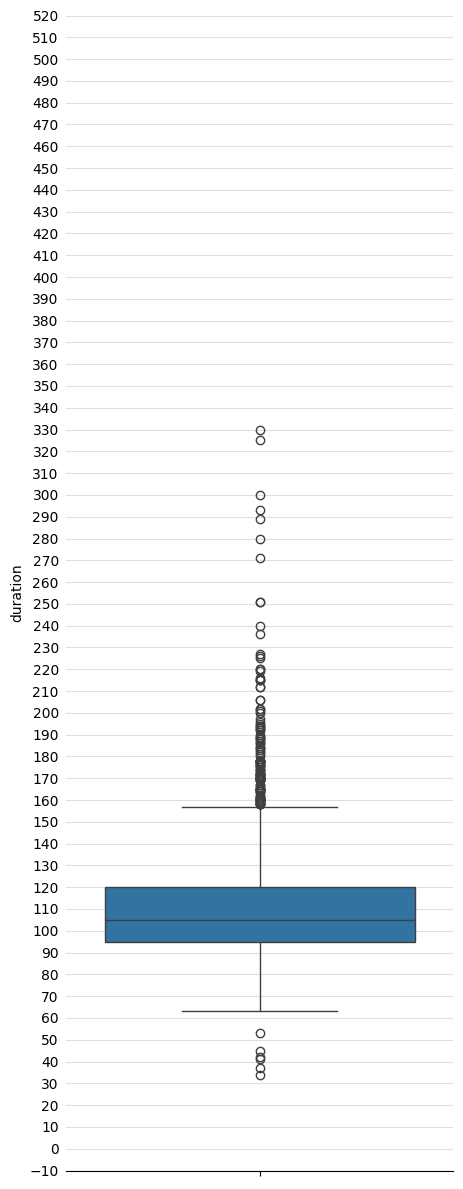

In [97]:
#Creating a boxplot to visualize the distribution of the 'duration' column
fig, ax=plt.subplots(figsize=(5,15))
sns.boxplot(df2['duration'])
ax.set_yticks(list(np.arange(-10,530,10)))
ax.tick_params(axis='y', pad=5, length=0)
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

ax.grid(axis='y', alpha=0.4)
ax.set_axisbelow(True)
plt.show()

In [98]:
#Calculating and displaying the lower whisker, median, and upper whisker values from the boxplot
lines=ax.get_lines()
lw=int(lines[2].get_ydata()[0])
md=int(lines[4].get_ydata()[0])
uw=int(lines[3].get_ydata()[0])
print("Lower Whisker:",lw)
print("Median:",md)
print("Upper Whisker:",uw)

Lower Whisker: 63
Median: 105
Upper Whisker: 157


In [99]:
#Replacing outliers in the 'duration' column with the median value
df2['duration'].mask((df2['duration'] < lw) | (df2['duration'] > uw), md, inplace=True)

In [100]:
#Calculating and updating the variable 'md'
#to store the median value of the 'budget' column
md=int(df2['budget'].median())

In [101]:
#Replacing negative values in the 'budget' column with the median value
df2['budget'].mask((df2['budget'] < 0), md, inplace=True)

In [102]:
#updating the variable 'md' to store the median value of the 'gross' column
md=int(df2['gross'].median())

In [103]:
#Replacing negative values in the 'gross' column with the median value
df2['gross'].mask((df2['gross'] < 0), md, inplace=True)

# Handling Errors

In [104]:
#Counting and sorting the unique values in the 'aspect_ratio' column
#in descending order
df2['aspect_ratio'].value_counts().sort_index(ascending=False)

aspect_ratio
16.00       1
2.76        3
2.55        1
2.40        3
2.39       11
2.35     2020
2.24        1
2.20       10
2.00        3
1.85     1582
1.78       41
1.77        1
1.75        2
1.66       40
1.50        1
1.37       50
1.33       19
1.18        1
Name: count, dtype: int64

In [105]:
#eplacing the values of 16.00 in the 'aspect_ratio' column with 1.78
#to standardize the aspect ratio data.
df2['aspect_ratio'].mask((df2['aspect_ratio'] == 16.00), 1.78, inplace=True)

In [107]:
#Fetching the unique values in the 'country' column, and
#sorting them in ascending order
a=df2['country'].unique()
a.sort()
a

array(['Afghanistan', 'Argentina', 'Aruba', 'Australia', 'Belgium',
       'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'New Line', 'New Zealand', 'Norway', 'Official site', 'Peru',
       'Philippines', 'Poland', 'Romania', 'Russia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Taiwan', 'Thailand', 'UK',
       'USA', 'West Germany'], dtype=object)

In [108]:
#Filtering to include rows where the 'country' column value is 'Official site'
df2[df2['country']=='Official site']

movie_title  color director_name      actor_1_name  actor_2_name  \
2629  Country Strong  Color   Shana Feste  Leighton Meester  Cinda McCain   

     actor_3_name        country  duration  aspect_ratio language  \
2629   Tim McGraw  Official site       117          2.35  English   

                                          plot_keywords  title_year  \
2629  country music|panties|pink panties|relapse|son...        2010   

     content_rating  facenumber_in_poster    budget     gross  \
2629          PG-13                     4  15000000  20218921   

                                        movie_imdb_link  imdb_score  \
2629  http://www.imdb.com/title/tt1555064/?ref_=fn_t...         6.3   

      num_critic_for_reviews  num_voted_users  num_user_for_reviews  \
2629                     135            14814                   114   

      movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
2629                     0                       19                    3000   

      actor_2_facebook_likes  actor_3_facebook_likes  \
2629                     646                     461   

      cast_total_facebook_likes       genres  
2629                       4204  Drama|Music

In [109]:
#Updating the value in the 'country' column at index 2629 to 'USA'
df2['country'].loc[2629]='USA'

In [110]:
#Fetching the unique values in the 'title_year' column, and
#sorting them in ascending order
a=df2['title_year'].unique()
a.sort()
a

array([1920, 1927, 1929, 1933, 1935, 1936, 1937, 1939, 1940, 1946, 1947,
       1948, 1950, 1952, 1953, 1954, 1957, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [111]:
#Filtering to include rows where the 'title_year' column value is less than 1916
df2[df2['title_year']<1916]

Empty DataFrame
Columns: [movie_title, color, director_name, actor_1_name, actor_2_name, actor_3_name, country, duration, aspect_ratio, language, plot_keywords, title_year, content_rating, facenumber_in_poster, budget, gross, movie_imdb_link, imdb_score, num_critic_for_reviews, num_voted_users, num_user_for_reviews, movie_facebook_likes, director_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, cast_total_facebook_likes, genres]
Index: []

In [113]:
#Fetching the unique values in the 'content_rating' column, and
#sorting them in ascending order
a=df2['content_rating'].unique()
a.sort()
a

array(['Approved', 'G', 'GP', 'M', 'NC-17', 'Not Rated', 'PG', 'PG-13',
       'Passed', 'R', 'Unrated', 'X'], dtype=object)

In [114]:
#Fetching the unique values in the 'facenumber_in_poster' column, and
#sorting them in ascending order
a=df2['facenumber_in_poster'].unique()
a.sort()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19,
       31, 43])

In [115]:
#Filtering to include rows where the value is greater than 15
df2[df2['facenumber_in_poster']>15]

movie_title  color         director_name          actor_1_name  \
1349          The Master  Color  Paul Thomas Anderson           Mike Howard   
2269  Battle of the Year  Color            Benson Lee           Chris Brown   
3399  500 Days of Summer  Color             Marc Webb  Joseph Gordon-Levitt   

            actor_2_name     actor_3_name country  duration  aspect_ratio  \
1349  Jeffrey W. Jenkins  Bruce Goodchild     USA       144          1.85   
2269          Caity Lotz       Laz Alonso     USA       110          1.85   
3399  Chloë Grace Moretz  Zooey Deschanel     USA        95          2.35   

     language                                      plot_keywords  title_year  \
1349  English  drifter|past life regression|psychological tes...        2012   
2269  English  3 dimensional|box office flop|critically bashe...        2013   
3399  English       friend|greeting card|office|summer|true love        2009   

     content_rating  facenumber_in_poster    budget     gross  \
1349              R                    31  32000000  16377274   
2269          PG-13                    19  20000000   8888355   
3399          PG-13                    43   7500000  32391374   

                                        movie_imdb_link  imdb_score  \
1349  http://www.imdb.com/title/tt1560747/?ref_=fn_t...         7.1   
2269  http://www.imdb.com/title/tt1532958/?ref_=fn_t...         5.0   
3399  http://www.imdb.com/title/tt1022603/?ref_=fn_t...         7.7   

      num_critic_for_reviews  num_voted_users  num_user_for_reviews  \
1349                     546           105144                   405   
2269                      65             7894                    25   
3399                     331           376600                   494   

      movie_facebook_likes  director_facebook_likes  actor_1_facebook_likes  \
1349                 27000                        0                     378   
2269                     0                        9                     997   
3399                 40000                      464                   23000   

      actor_2_facebook_likes  actor_3_facebook_likes  \
1349                      18                      15   
2269                     941                     826   
3399                   17000                   11000   

      cast_total_facebook_likes                genres  
1349                        427                 Drama  
2269                       3177           Drama|Music  
3399                      54075  Comedy|Drama|Romance

In [116]:
print(df2['imdb_score'].min())
print(df2['imdb_score'].max())

1.6
9.3


In [117]:
df2.to_excel("Imdb__Movies_Preprocessed_1.xlsx")